<a href="https://colab.research.google.com/github/ChapelFob80930/AI-Generated-Text-Detector/blob/main/AITextTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the Dataset**

In [1]:
import numpy as np
import pandas as pd

ai_generated_dataset = pd.read_csv("/content/train_v2_drcat_02.csv")
print(ai_generated_dataset.shape)
ai_generated_dataset = ai_generated_dataset.dropna()
ai_generated_dataset = ai_generated_dataset.drop(columns=['prompt_name','source','RDizzl3_seven'])
print(ai_generated_dataset.head())
print(ai_generated_dataset.shape)

(44868, 5)
                                                text  label
0  Phones\n\nModern humans today are always on th...      0
1  This essay will explain if drivers should or s...      0
2  Driving while the use of cellular devices\n\nT...      0
3  Phones & Driving\n\nDrivers should not be able...      0
4  Cell Phone Operation While Driving\n\nThe abil...      0
(44868, 2)


In [2]:
import nltk
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> D

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_eng to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package averaged_perceptron_tagger_rus to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_rus.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_d


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> Q


True

In [3]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

# def lemmatize_text(text):
#   doc = nlp(" ".join(text))
#   return [token.lemma_ for token in doc]

In [4]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')

# stop_words = set(stopwords.words('english'))

# def _remove_stopwords_(texts):
#   return [text for text in texts if text.isalnum() and text not in stop_words]

In [5]:
# from nltk.tokenize import word_tokenize
# nltk.download('punkt')

# def preprocess_text(series):
#     def process(text):
#         tokens = word_tokenize(text)
#         tokens = _remove_stopwords_(tokens)
#         tokens = lemmatize_text(tokens)
#         return " ".join(tokens)
#     return series.apply(process)


#**Preprocessing Data**

In [55]:
import numpy as np
import pandas as pd
import spacy
from joblib import Parallel, delayed
from tqdm.notebook import tqdm
from nltk.corpus import stopwords
import nltk


nlp = spacy.load('en_core_web_sm')


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def preprocess(text):
    """Tokenize, remove stopwords, and lemmatize text using spaCy."""
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text.lower() not in stop_words]
    return " ".join(tokens)


def parallel_preprocessing(series):
    """Preprocess text using spaCy, parallel processing, and tqdm for progress tracking."""
    tqdm.pandas()
    return Parallel(n_jobs=10, backend="multiprocessing")(delayed(preprocess)(text) for text in tqdm(series, desc="Preprocessing"))


ai_generated_dataset["preprocessedText"] = parallel_preprocessing(ai_generated_dataset["text"])

print(ai_generated_dataset.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing:   0%|          | 0/44868 [00:00<?, ?it/s]

                                                text  label  \
0  Phones\n\nModern humans today are always on th...      0   
1  This essay will explain if drivers should or s...      0   
2  Driving while the use of cellular devices\n\nT...      0   
3  Phones & Driving\n\nDrivers should not be able...      0   
4  Cell Phone Operation While Driving\n\nThe abil...      0   

                                    preprocessedText  \
0  phone Modern human today always phone always p...   
1  essay explain driver able use electronic devic...   
2  drive use cellular device today society though...   
3  Phones Driving driver able use phone operate v...   
4  Cell Phone Operation drive ability stay connec...   

                                      word2vecVector  \
0  [-0.6893316, 0.093769744, 0.8798971, -0.255222...   
1  [-0.064742155, -0.0043958025, 0.63268715, -0.3...   
2  [-0.19005047, 0.36538157, 1.0411335, -0.195873...   
3  [0.07544267, -0.2946951, 1.1736742, -0.7450177...   
4  [

In [56]:
# train_essays["preprocessedText"]=preprocess_text(train_essays['text'])

In [57]:
# ai_human_dataset["preprocessedText"]=preprocess_text(ai_human_dataset['text'])

In [58]:
# print(train_essays.head())

In [59]:
# print(ai_human_dataset.head())

In [60]:
# from gensim.models import Word2Vec

# sentences = train_essays['preprocessedText'].apply(lambda x: x.split())

# word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# word_vector = word2vec_model.wv['car']
# print("Vector for 'car':", word_vector)

# # train_essays['word2vecVector'] = sentences.apply(
# #     lambda x: sum([word2vec_model.wv[word] for word in x if word in word2vec_model.wv]) / len(x)
# # )

# def calculate_average_word_vector(words,model,vector_size=100):
#     word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
#     if word_vectors:
#         return np.mean(word_vectors, axis=0)
#     else:
#         return np.zeros(vector_size)

# train_essays['word2vecVector'] = train_essays['preprocessedText'].apply(lambda x: calculate_average_word_vector(x.split(),word2vec_model))


In [61]:
# from gensim.models import Word2Vec

# sentences = ai_human_dataset["preprocessedText"].apply(lambda x: x.split())

# word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# word_vector = word2vec_model.wv['car']
# print("Vector for 'car':", word_vector)

# # train_essays['word2vecVector'] = sentences.apply(
# #     lambda x: sum([word2vec_model.wv[word] for word in x if word in word2vec_model.wv]) / len(x)
# # )

# def calculate_average_word_vector(words,model,vector_size=100):
#     word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
#     if word_vectors:
#         return np.mean(word_vectors, axis=0)
#     else:
#         return np.zeros(vector_size)

# ai_human_dataset['word2vecVector'] = ai_human_dataset["preprocessedText"].apply(lambda x: calculate_average_word_vector(x.split(),word2vec_model))


#**Creating Word2Vec Embeddings**

In [117]:
from gensim.models import Word2Vec

sentences = ai_generated_dataset["preprocessedText"].apply(lambda x: x.split())

word2vec_model = Word2Vec(sentences, vector_size=200, window=5, min_count=2, workers=4, sg=1)

word_vector = word2vec_model.wv['car']
print("Vector for 'car':", word_vector)


def calculate_average_word_vector(words,model,vector_size=300):
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

def parallel_word2vec(row):
    return calculate_average_word_vector(row.split(), word2vec_model)

# ai_generated_dataset['word2vecVector'] = ai_generated_dataset["preprocessedText"].apply(lambda x: calculate_average_word_vector(x.split(),word2vec_model))
ai_generated_dataset['word2vecVector'] = Parallel(n_jobs=10,backend='multiprocessing')(delayed(parallel_word2vec)(row) for row in tqdm(ai_generated_dataset["preprocessedText"], desc="Word2Vec"))
print(ai_generated_dataset.head())



Vector for 'car': [-0.0636666   0.23475057 -0.18255882 -0.16660354  0.39217868  0.00799663
 -0.29835993  0.00493173 -0.19389066 -0.29344353 -0.22812043  0.18123949
 -0.25562748 -0.08685602  0.4680165  -0.03580776 -0.26334563 -0.04828791
  0.3119703  -0.1413084  -0.20289983  0.03453816 -0.0684464   0.4523035
 -0.3315601  -0.2054588  -0.15944803 -0.38765916 -0.5407766   0.38756007
  0.06365053 -0.04440372 -0.4847339  -0.3201821   0.19961485  0.19198279
  0.04251149 -0.23530525  0.5261309  -0.18752162  0.14107955  0.02692058
  0.23737983  0.22571743  0.19918984  0.08023145  0.03506191 -0.26830155
  0.08216594 -0.34096187 -0.21487375  0.18750863  0.5324446   0.38274175
 -0.13591027 -0.1082729   0.00824564 -0.591666   -0.69586456  0.09268297
  0.16748078 -0.2801683  -0.01298709 -0.23033316 -0.16607557  0.1322294
  0.27521357  0.17928763 -0.4471001   0.29802558 -0.3579706   0.02277763
 -0.3660814   0.5455942  -0.2045666  -0.00862512 -0.2595024  -0.18775944
 -0.1228297  -0.45907447 -0.4009784

Word2Vec: 100%|██████████| 44868/44868 [00:46<00:00, 957.43it/s]


                                                text  label  \
0  Phones\n\nModern humans today are always on th...      0   
1  This essay will explain if drivers should or s...      0   
2  Driving while the use of cellular devices\n\nT...      0   
3  Phones & Driving\n\nDrivers should not be able...      0   
4  Cell Phone Operation While Driving\n\nThe abil...      0   

                                    preprocessedText  \
0  phone Modern human today always phone always p...   
1  essay explain driver able use electronic devic...   
2  drive use cellular device today society though...   
3  Phones Driving driver able use phone operate v...   
4  Cell Phone Operation drive ability stay connec...   

                                      word2vecVector  \
0  [-0.081819415, 0.19098642, -0.04977864, -0.003...   
1  [-0.076303616, 0.27143955, -0.10123025, -0.010...   
2  [-0.08941499, 0.24875109, -0.094683185, -0.061...   
3  [-0.07063061, 0.29794088, -0.063692935, -0.087...   
4  [

In [64]:
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(train_essays['preprocessedText'])]

# doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4)

# train_essays['doc2vecVector'] = train_essays.index.map(lambda x: doc2vec_model.dv[str(x)])


In [65]:
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(ai_human_dataset["preprocessedText"])]

# doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4)

# ai_human_dataset['doc2vecVector'] = ai_human_dataset.index.map(lambda x: doc2vec_model.dv[str(x)])

#**Creating Doc2Vec Embeddings**

In [118]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


def prepare_tagged_documents(series):
    """Prepare tagged documents for Doc2Vec."""
    return [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(series)]


tqdm.pandas(desc="Preparing Tagged Documents")
tagged_data = prepare_tagged_documents(tqdm(ai_generated_dataset["preprocessedText"], desc="Tagging Data"))


doc2vec_model = Doc2Vec(tagged_data, vector_size=300, window=5, min_count=2, workers=4, dm=1,epochs=20)

# Function to generate Doc2Vec vectors
def generate_doc2vec_vector(index):
    """Generate a Doc2Vec vector for a given index."""
    return doc2vec_model.dv[str(index)]

# Use tqdm and joblib to parallelize vector generation
def generate_doc2vec_vectors_parallel(dataframe):
    """Generate Doc2Vec vectors in parallel with progress tracking."""
    indices = dataframe.index
    return Parallel(n_jobs=10, backend="multiprocessing")(delayed(generate_doc2vec_vector)(index) for index in tqdm(indices, desc="Generating Doc2Vec Vectors"))

ai_generated_dataset['doc2vecVector'] = generate_doc2vec_vectors_parallel(ai_generated_dataset)


print(ai_generated_dataset.head())


Generating Doc2Vec Vectors: 100%|██████████| 44868/44868 [00:09<00:00, 4742.62it/s]


                                                text  label  \
0  Phones\n\nModern humans today are always on th...      0   
1  This essay will explain if drivers should or s...      0   
2  Driving while the use of cellular devices\n\nT...      0   
3  Phones & Driving\n\nDrivers should not be able...      0   
4  Cell Phone Operation While Driving\n\nThe abil...      0   

                                    preprocessedText  \
0  phone Modern human today always phone always p...   
1  essay explain driver able use electronic devic...   
2  drive use cellular device today society though...   
3  Phones Driving driver able use phone operate v...   
4  Cell Phone Operation drive ability stay connec...   

                                      word2vecVector  \
0  [-0.081819415, 0.19098642, -0.04977864, -0.003...   
1  [-0.076303616, 0.27143955, -0.10123025, -0.010...   
2  [-0.08941499, 0.24875109, -0.094683185, -0.061...   
3  [-0.07063061, 0.29794088, -0.063692935, -0.087...   
4  [

In [67]:
# print(train_essays.head())

In [68]:
# from sklearn.model_selection import train_test_split

# y = train_essays['generated']

# train_index, test_index = train_test_split(train_essays.index, test_size=0.2, random_state=42)

#**Splitting the Test and Train indexes and Separating the Labels from the Data**

In [120]:
from sklearn.model_selection import train_test_split

y = ai_generated_dataset['label']

train_index, test_index = train_test_split(ai_generated_dataset.index, test_size=0.3, random_state=42, stratify = y)


In [121]:
print(train_index.shape)
print(test_index.shape)

(31407,)
(13461,)


In [71]:
# from sklearn.model_selection import train_test_split

# y = ai_human_dataset['generated']

# train_index, test_index = train_test_split(ai_human_dataset.index, test_size=0.2, random_state=42)

In [72]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# X_tfidf = tfidf_vectorizer.fit_transform(train_essays['preprocessedText'])

# X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
# y_train, y_test = y[train_index], y[test_index]


#**Creating TF-IDF Embeddings**

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,2),max_df=0.95,min_df=2)
X_tfidf = tfidf_vectorizer.fit_transform(ai_generated_dataset["preprocessedText"])

X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
y_train, y_test = y[train_index], y[test_index]


In [127]:
print(X_train_tfidf.shape)

(31407, 5000)


#**Splitting Word2Vec Embeddings into Train and Test Datasets**

In [128]:
ai_generated_dataset['word2vecVector'] = ai_generated_dataset['word2vecVector'].apply(lambda x: np.array(x))

X_word2vec = np.stack(ai_generated_dataset['word2vecVector'].values)

X_train_word2vec, X_test_word2vec = X_word2vec[train_index], X_word2vec[test_index]

print(X_train_word2vec.shape)
print(X_test_word2vec.shape)
print(X_train_word2vec)

(31407, 200)
(13461, 200)
[[-0.29360816 -0.0367032   0.06181006 ... -0.20495306  0.16203232
   0.07086422]
 [-0.12210069  0.13502797 -0.04451812 ... -0.21656758  0.2655291
  -0.07653192]
 [-0.18999018  0.01325027 -0.12536232 ... -0.16631173  0.0440075
   0.04325811]
 ...
 [-0.17851578  0.13349973 -0.05775313 ... -0.24209651  0.1106191
   0.01424334]
 [-0.11689392  0.10384934 -0.06951989 ... -0.29235652  0.17251258
   0.04413881]
 [-0.232422    0.17200443 -0.01799917 ... -0.28825307  0.11308067
   0.08496699]]


In [76]:
# train_essays['word2vecVector'] = train_essays['word2vecVector'].apply(lambda x: np.array(x))

# X_word2vec = np.stack(train_essays['word2vecVector'].values)

# X_train_word2vec, X_test_word2vec = X_word2vec[train_index], X_word2vec[test_index]

# print(X_train_word2vec.shape)
# print(X_test_word2vec.shape)
# print(X_train_word2vec)

#**Splitting Doc2Vec Embeddings into Train and Test Datasets**

In [129]:
ai_generated_dataset['doc2vecVector'] = ai_generated_dataset['doc2vecVector'].apply(lambda x: np.array(x))
X_doc2vec = np.stack(ai_generated_dataset['doc2vecVector'].values)
X_train_doc2vec, X_test_doc2vec = X_doc2vec[train_index], X_doc2vec[test_index]
print(X_train_doc2vec.shape)
print(X_test_doc2vec.shape)
print(X_train_doc2vec)

(31407, 300)
(13461, 300)
[[ 0.47079268  0.3862721  -0.30574837 ...  0.4699495  -0.16932376
  -0.07093748]
 [ 0.08348466 -0.35621175  0.22115448 ...  0.3034067   0.3810921
  -0.08207833]
 [-0.19633393  0.18232296  0.03882015 ...  0.72958124 -0.26837218
   0.25892836]
 ...
 [ 0.3599332   0.0954421   0.00875529 ...  0.6493465   0.03653765
   0.11843975]
 [ 0.26388338  0.04447308 -0.58638996 ...  0.15688398 -0.3383937
   0.09476799]
 [ 0.08138495  0.23606046 -0.11861278 ...  0.69761074 -0.15076777
  -0.29296848]]


In [78]:
# train_essays['doc2vecVector'] = train_essays['doc2vecVector'].apply(lambda x: np.array(x))
# X_doc2vec = np.stack(train_essays['doc2vecVector'].values)
# X_train_doc2vec, X_test_doc2vec = X_doc2vec[train_index], X_doc2vec[test_index]
# print(X_train_doc2vec.shape)
# print(X_test_doc2vec.shape)
# print(X_train_doc2vec)

#**Implementing SVM on Different Types of Embeddings and Comparing Results**

In [79]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# def evaluate_svm_model(X_train, X_test, y_train, y_test):
#     svm_model = SVC(class_weight='balanced',random_state=42)
#     svm_model.fit(X_train, y_train)
#     y_pred = svm_model.predict(X_test)
#     return {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred,),
#         "Recall": recall_score(y_test, y_pred),
#         "F1-Score": f1_score(y_test, y_pred)
#     }


# results_tfidf = evaluate_svm_model(X_train_tfidf, X_test_tfidf, y_train, y_test)
# print("TF-IDF Results for SVM:", results_tfidf)


# results_word2vec = evaluate_svm_model(X_train_word2vec, X_test_word2vec, y_train, y_test)
# print("Word2Vec Results for SVM:", results_word2vec)


# results_doc2vec = evaluate_svm_model(X_train_doc2vec, X_test_doc2vec, y_train, y_test)
# print("Doc2Vec Results for SVM:", results_doc2vec)


#**Implementing Decision Tree on Different Types of Embeddings and Comparing Results**

In [80]:
# from sklearn.tree import DecisionTreeClassifier
# def evaluate_decisionTree_model(X_train, X_test, y_train, y_test):
#     dt_model = DecisionTreeClassifier(random_state=42)
#     dt_model.fit(X_train, y_train)
#     y_pred = dt_model.predict(X_test)
#     return {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred,),
#         "Recall": recall_score(y_test, y_pred),
#         "F1-Score": f1_score(y_test, y_pred)
#     }

# results_tfidf = evaluate_decisionTree_model(X_train_tfidf, X_test_tfidf, y_train, y_test)
# print("TF-IDF Results for Decision Tree:", results_tfidf)


# results_word2vec = evaluate_decisionTree_model(X_train_word2vec, X_test_word2vec, y_train, y_test)
# print("Word2Vec Results for Decision Tree:", results_word2vec)


# results_doc2vec = evaluate_decisionTree_model(X_train_doc2vec, X_test_doc2vec, y_train, y_test)
# print("Doc2Vec Results for Decision Tree:", results_doc2vec)


#**Implementing Random Forest on Different Types of Embeddings and Comparing Results**

In [81]:
# from sklearn.ensemble import RandomForestClassifier
# def evaluate_randomForest_model(X_train, X_test, y_train, y_test):
#     rf_model = RandomForestClassifier(random_state=42)
#     rf_model.fit(X_train, y_train)
#     y_pred = rf_model.predict(X_test)
#     return {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred,),
#         "Recall": recall_score(y_test, y_pred),
#         "F1-Score": f1_score(y_test, y_pred)
#     }
# results_tfidf = evaluate_randomForest_model(X_train_tfidf, X_test_tfidf, y_train, y_test)
# print("TF-IDF Results for Random Forest:", results_tfidf)


# results_word2vec = evaluate_randomForest_model(X_train_word2vec, X_test_word2vec, y_train, y_test)
# print("Word2Vec Results for Random Forest:", results_word2vec)


# results_doc2vec = evaluate_randomForest_model(X_train_doc2vec, X_test_doc2vec, y_train, y_test)
# print("Doc2Vec Results for Random Forest:", results_doc2vec)

#**Implementing KNN on Different Types of Embeddings and Comparing Results**

In [82]:
# from sklearn.neighbors import KNeighborsClassifier
# # import matplotlib.pyplot as plt
# def evaluate_knn_model(X_train, X_test, y_train, y_test,n):
#     knn_model = KNeighborsClassifier(n_neighbors=n)
#     knn_model.fit(X_train, y_train)
#     y_pred = knn_model.predict(X_test)
#     return {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred,),
#         "Recall": recall_score(y_test, y_pred),
#         "F1-Score": f1_score(y_test, y_pred)
#     }

# results_tfidf = evaluate_knn_model(X_train_tfidf, X_test_tfidf, y_train, y_test,3)
# print("TF-IDF Results for KNN:", results_tfidf)


# results_word2vec = evaluate_knn_model(X_train_word2vec, X_test_word2vec, y_train, y_test,3)
# print("Word2Vec Results for KNN:", results_word2vec)


# results_doc2vec = evaluate_knn_model(X_train_doc2vec, X_test_doc2vec, y_train, y_test,3)
# print("Doc2Vec Results for KNN:", results_doc2vec)



In [130]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

def evaluate_model_with_visualizations(model, X_train, X_test, y_train, y_test, model_name, embedding_name):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    print(f"Performing 5-Fold Cross-Validation for {model_name} with {embedding_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    print(f"{model_name} with {embedding_name} - Cross-validation Scores: {cv_scores}")
    print(f"{model_name} with {embedding_name} - Mean CV Accuracy: {cv_scores.mean():.4f}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name} with {embedding_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"{model_name} with {embedding_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_test)), y_test, alpha=0.6, label='Actual')
    plt.scatter(range(len(y_pred)), y_pred, alpha=0.6, label='Predicted', marker='x')
    plt.title(f'Scatter Plot: {model_name} with {embedding_name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Labels')
    plt.legend()
    plt.show()

In [131]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [132]:
# svm_param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': [0.01, 0.1, 1]
# }

# dt_param_grid = {
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# rf_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# knn_param_grid = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance']
# }

In [133]:
print(ai_generated_dataset['label'].value_counts(normalize=True))

label
0    0.610034
1    0.389966
Name: proportion, dtype: float64


Performing 5-Fold Cross-Validation for SVM with TF-IDF...
SVM with TF-IDF - Cross-validation Scores: [0.99522445 0.99538364 0.99570132 0.99506448 0.99458685]
SVM with TF-IDF - Mean CV Accuracy: 0.9952


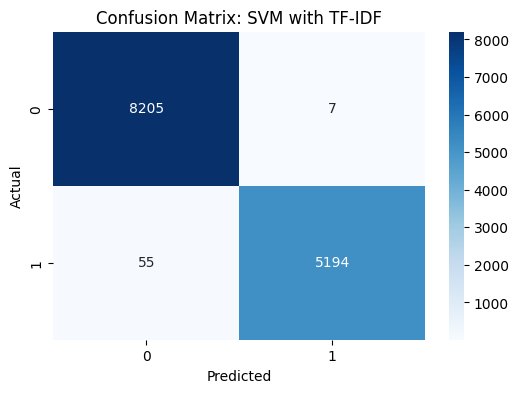

SVM with TF-IDF - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8212
           1       1.00      0.99      0.99      5249

    accuracy                           1.00     13461
   macro avg       1.00      0.99      1.00     13461
weighted avg       1.00      1.00      1.00     13461



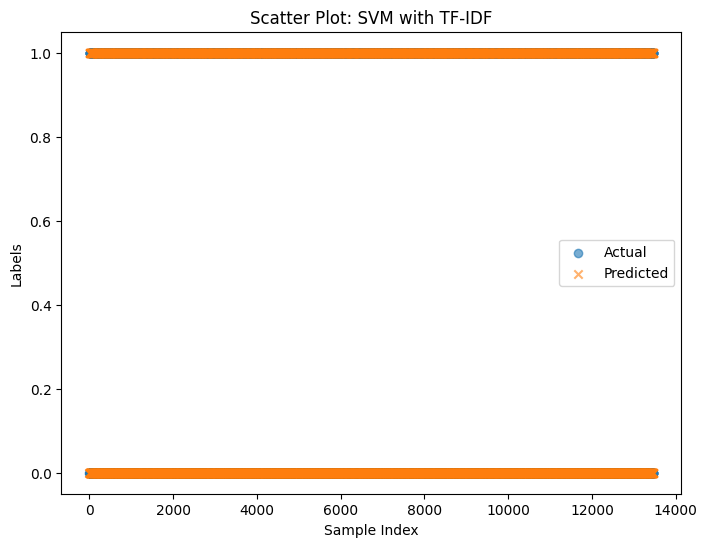

In [136]:
svm_model_tfidf = SVC(class_weight='balanced',random_state=42,kernel='rbf',gamma='scale',C=1)
evaluate_model_with_visualizations(svm_model_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test, "SVM", "TF-IDF")

Performing 5-Fold Cross-Validation for SVM with Word2Vec...
SVM with Word2Vec - Cross-validation Scores: [0.9840815  0.98710602 0.9875816  0.98567107 0.98774081]
SVM with Word2Vec - Mean CV Accuracy: 0.9864


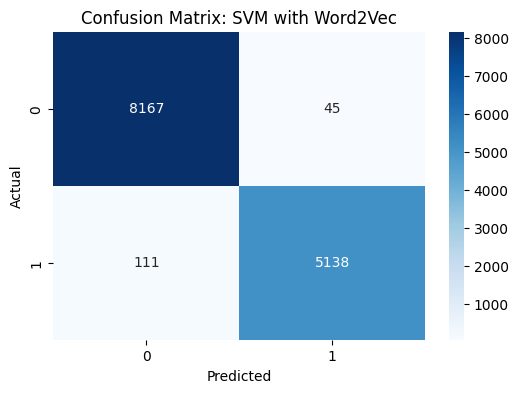

SVM with Word2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8212
           1       0.99      0.98      0.99      5249

    accuracy                           0.99     13461
   macro avg       0.99      0.99      0.99     13461
weighted avg       0.99      0.99      0.99     13461



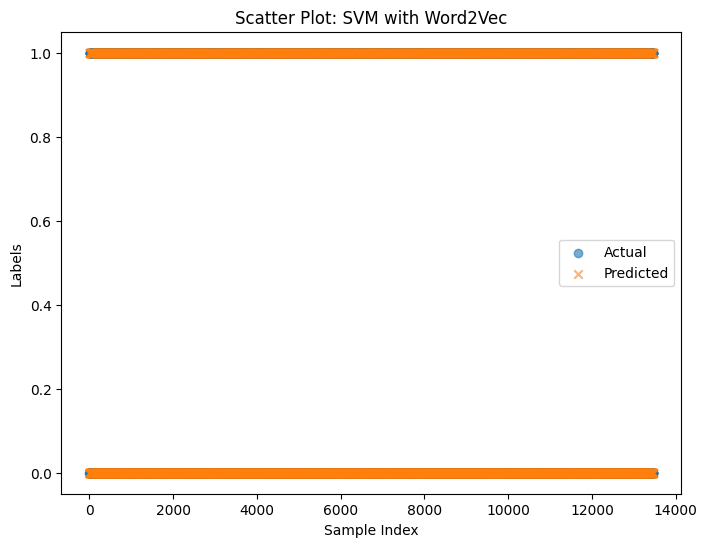

In [137]:
svm_model_word2vec = SVC(class_weight='balanced',random_state=42, C=1, kernel='rbf', gamma='scale')
evaluate_model_with_visualizations(svm_model_word2vec, X_train_word2vec, X_test_word2vec, y_train, y_test, "SVM", "Word2Vec")

Performing 5-Fold Cross-Validation for SVM with Doc2Vec...
SVM with Doc2Vec - Cross-validation Scores: [0.95049347 0.95272206 0.95510269 0.94937112 0.95621716]
SVM with Doc2Vec - Mean CV Accuracy: 0.9528


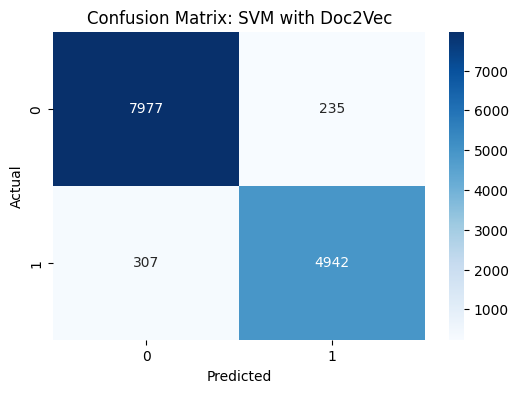

SVM with Doc2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8212
           1       0.95      0.94      0.95      5249

    accuracy                           0.96     13461
   macro avg       0.96      0.96      0.96     13461
weighted avg       0.96      0.96      0.96     13461



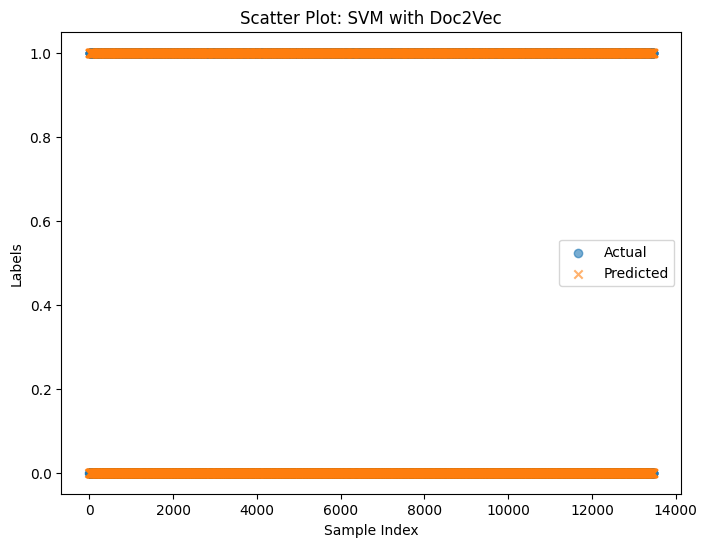

In [139]:
svm_model_doc2vec = SVC(class_weight='balanced',random_state=42, C=1, kernel='rbf', gamma='scale')
evaluate_model_with_visualizations(svm_model_doc2vec, X_train_doc2vec, X_test_doc2vec, y_train, y_test, "SVM", "Doc2Vec")

Performing 5-Fold Cross-Validation for Decision Tree with TF-IDF...
Decision Tree with TF-IDF - Cross-validation Scores: [0.92534225 0.92534225 0.92660404 0.92803694 0.92676325]
Decision Tree with TF-IDF - Mean CV Accuracy: 0.9264


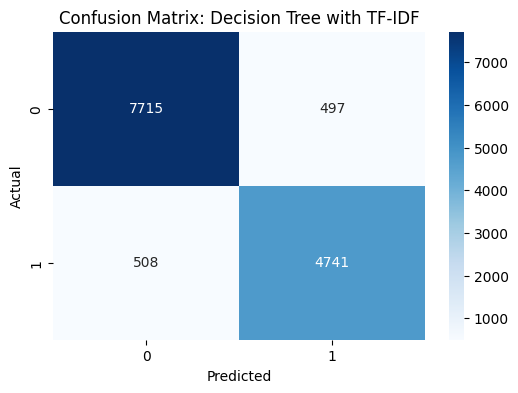

Decision Tree with TF-IDF - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8212
           1       0.91      0.90      0.90      5249

    accuracy                           0.93     13461
   macro avg       0.92      0.92      0.92     13461
weighted avg       0.93      0.93      0.93     13461



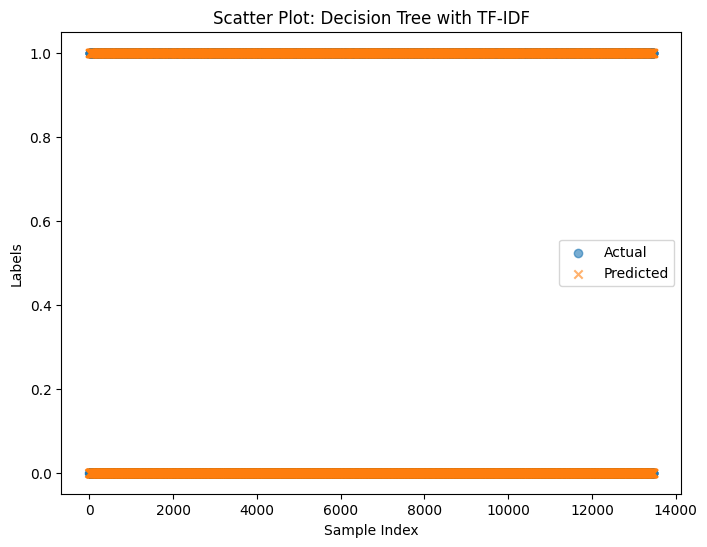

In [171]:
decision_tree_model_tfidf = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth=None,min_samples_split=5)
evaluate_model_with_visualizations(decision_tree_model_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test, "Decision Tree", "TF-IDF")

Performing 5-Fold Cross-Validation for Decision Tree with Word2Vec...
Decision Tree with Word2Vec - Cross-validation Scores: [0.93871379 0.93202802 0.93122114 0.92819615 0.93122114]
Decision Tree with Word2Vec - Mean CV Accuracy: 0.9323


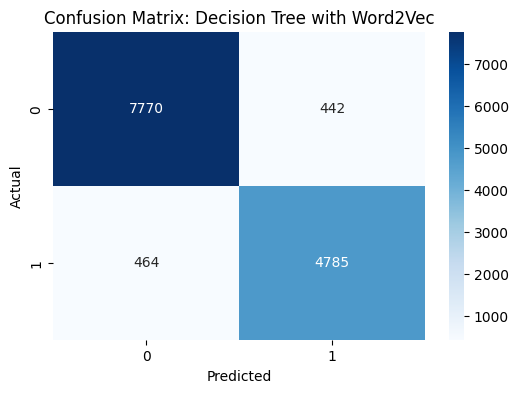

Decision Tree with Word2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8212
           1       0.92      0.91      0.91      5249

    accuracy                           0.93     13461
   macro avg       0.93      0.93      0.93     13461
weighted avg       0.93      0.93      0.93     13461



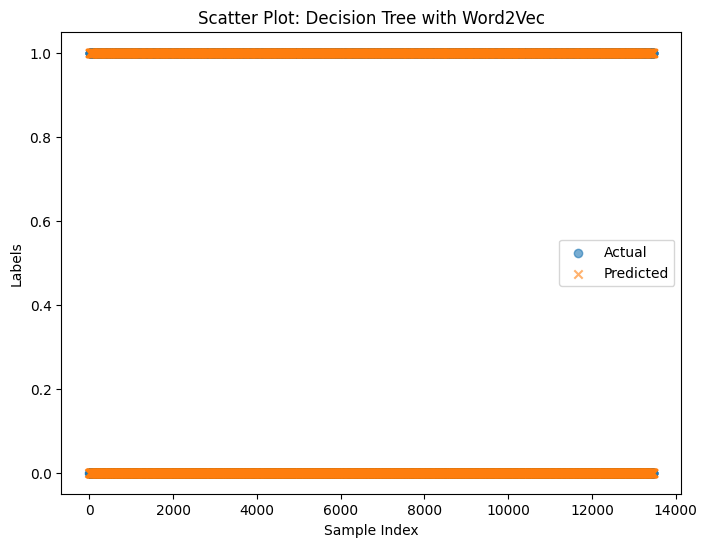

In [170]:
decision_tree_model_word2vec = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=None, min_samples_split=5)
evaluate_model_with_visualizations(decision_tree_model_word2vec, X_train_word2vec, X_test_word2vec, y_train, y_test, "Decision Tree", "Word2Vec")

Performing 5-Fold Cross-Validation for Decision Tree with Doc2Vec...
Decision Tree with Doc2Vec - Cross-validation Scores: [0.60904171 0.61684177 0.62107945 0.61805445 0.61662156]
Decision Tree with Doc2Vec - Mean CV Accuracy: 0.6163


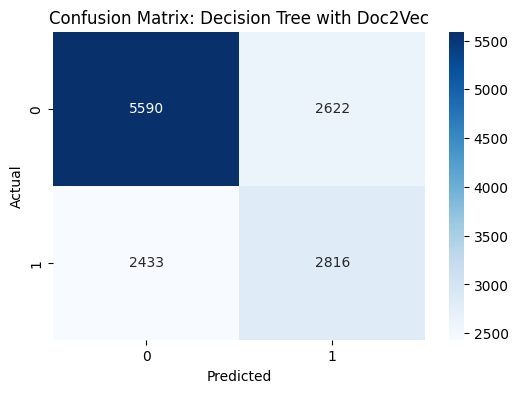

Decision Tree with Doc2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      8212
           1       0.52      0.54      0.53      5249

    accuracy                           0.62     13461
   macro avg       0.61      0.61      0.61     13461
weighted avg       0.63      0.62      0.63     13461



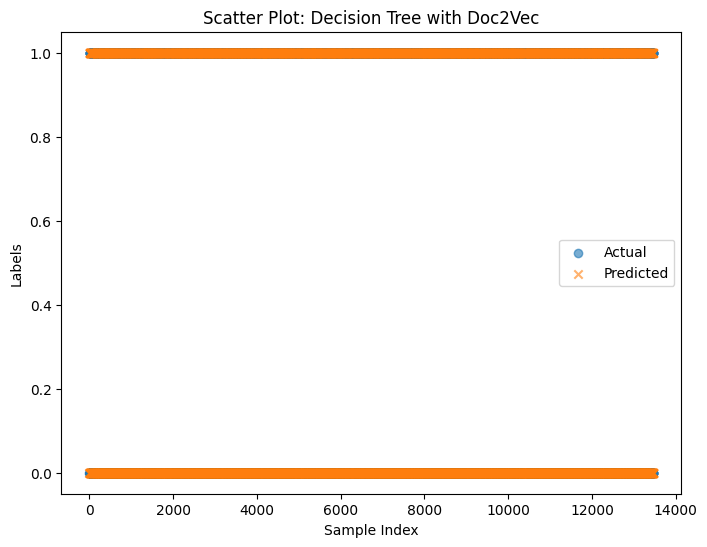

In [169]:
decision_tree_model_doc2vec = DecisionTreeClassifier(random_state=42, max_depth=None, min_samples_split=5)
evaluate_model_with_visualizations(decision_tree_model_doc2vec, X_train_doc2vec, X_test_doc2vec, y_train, y_test, "Decision Tree", "Doc2Vec")

Performing 5-Fold Cross-Validation for Random Forest with TF-IDF...
Random Forest with TF-IDF - Cross-validation Scores: [0.98631009 0.98455906 0.98264608 0.98487502 0.98503423]
Random Forest with TF-IDF - Mean CV Accuracy: 0.9847


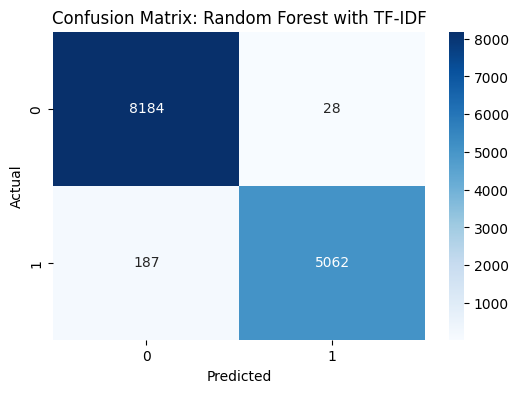

Random Forest with TF-IDF - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8212
           1       0.99      0.96      0.98      5249

    accuracy                           0.98     13461
   macro avg       0.99      0.98      0.98     13461
weighted avg       0.98      0.98      0.98     13461



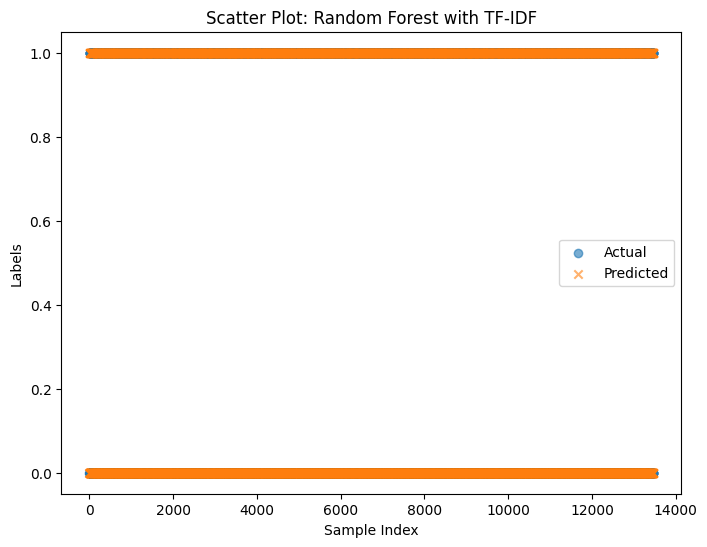

In [166]:
random_forest_model_tfidf = RandomForestClassifier(class_weight='balanced', random_state=42,n_estimators=200,max_depth=None,min_samples_split=5)
evaluate_model_with_visualizations(random_forest_model_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test, "Random Forest", "TF-IDF")

Performing 5-Fold Cross-Validation for Random Forest with Word2Vec...
Random Forest with Word2Vec - Cross-validation Scores: [0.97851003 0.98121617 0.98089476 0.97802898 0.98025792]
Random Forest with Word2Vec - Mean CV Accuracy: 0.9798


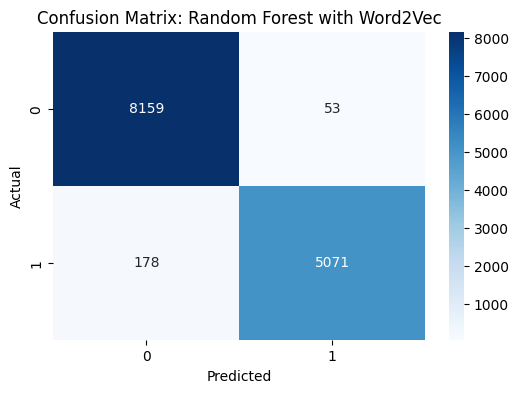

Random Forest with Word2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8212
           1       0.99      0.97      0.98      5249

    accuracy                           0.98     13461
   macro avg       0.98      0.98      0.98     13461
weighted avg       0.98      0.98      0.98     13461



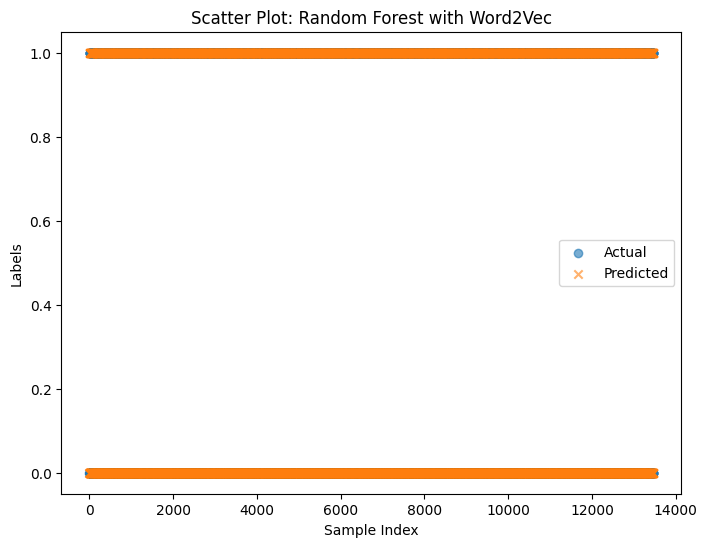

In [167]:
random_forest_model_word2vec = RandomForestClassifier(class_weight='balanced',random_state=42, n_estimators=200, max_depth=None, min_samples_split=5)
evaluate_model_with_visualizations(random_forest_model_word2vec, X_train_word2vec, X_test_word2vec, y_train, y_test, "Random Forest", "Word2Vec")

Performing 5-Fold Cross-Validation for Random Forest with Doc2Vec...
Random Forest with Doc2Vec - Cross-validation Scores: [0.75390003 0.75453677 0.74988059 0.75449769 0.75879637]
Random Forest with Doc2Vec - Mean CV Accuracy: 0.7543


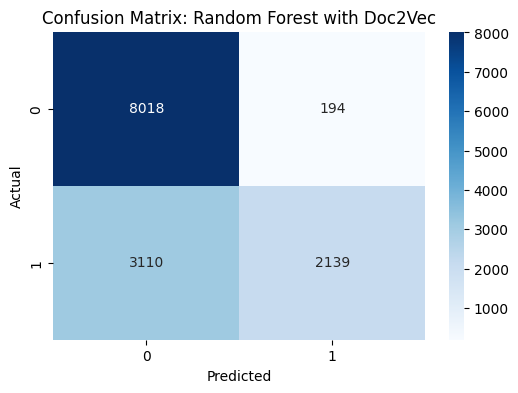

Random Forest with Doc2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.98      0.83      8212
           1       0.92      0.41      0.56      5249

    accuracy                           0.75     13461
   macro avg       0.82      0.69      0.70     13461
weighted avg       0.80      0.75      0.73     13461



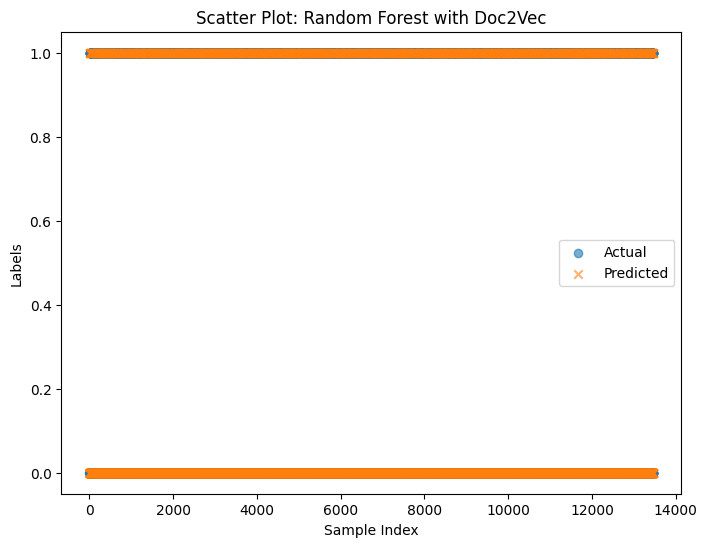

In [168]:
random_forest_model_doc2vec = RandomForestClassifier(class_weight='balanced',random_state=42, n_estimators=200, max_depth=None, min_samples_split=5)
evaluate_model_with_visualizations(random_forest_model_doc2vec, X_train_doc2vec, X_test_doc2vec, y_train, y_test, "Random Forest", "Doc2Vec")

Performing 5-Fold Cross-Validation for KNN with TF-IDF...
KNN with TF-IDF - Cross-validation Scores: [0.97580388 0.97994269 0.97850661 0.97786977 0.97452635]
KNN with TF-IDF - Mean CV Accuracy: 0.9773


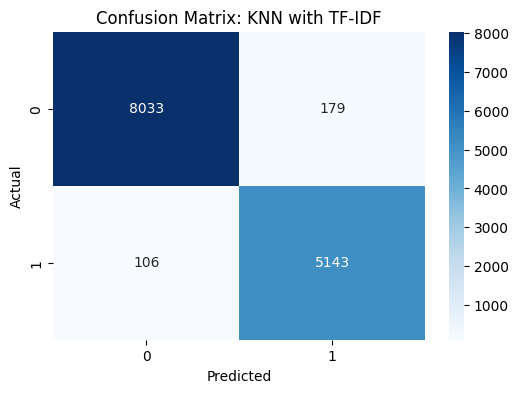

KNN with TF-IDF - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8212
           1       0.97      0.98      0.97      5249

    accuracy                           0.98     13461
   macro avg       0.98      0.98      0.98     13461
weighted avg       0.98      0.98      0.98     13461



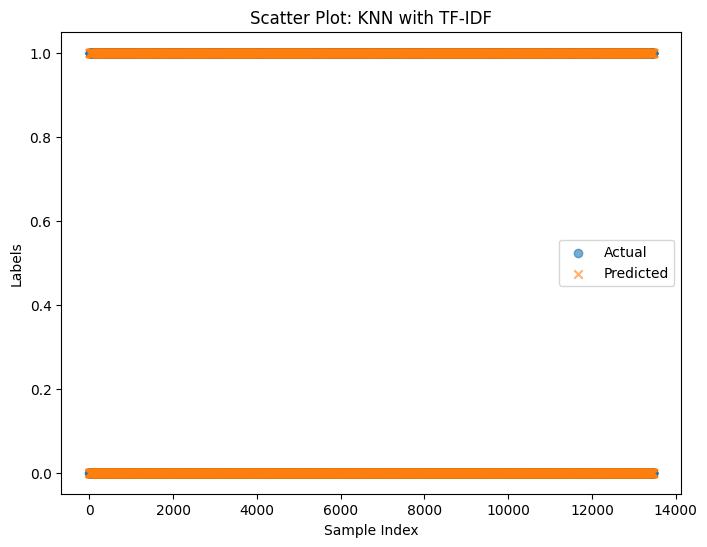

In [163]:
knn_model_tfidf = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='minkowski')
evaluate_model_with_visualizations(knn_model_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test, "KNN", "TF-IDF")

Performing 5-Fold Cross-Validation for KNN with Word2Vec...
KNN with Word2Vec - Cross-validation Scores: [0.98344476 0.98694683 0.9861487  0.98694475 0.98710396]
KNN with Word2Vec - Mean CV Accuracy: 0.9861


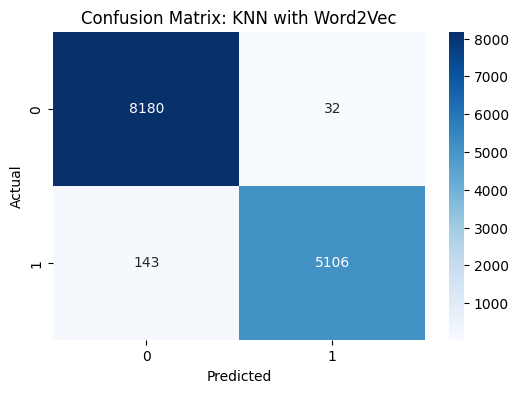

KNN with Word2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8212
           1       0.99      0.97      0.98      5249

    accuracy                           0.99     13461
   macro avg       0.99      0.98      0.99     13461
weighted avg       0.99      0.99      0.99     13461



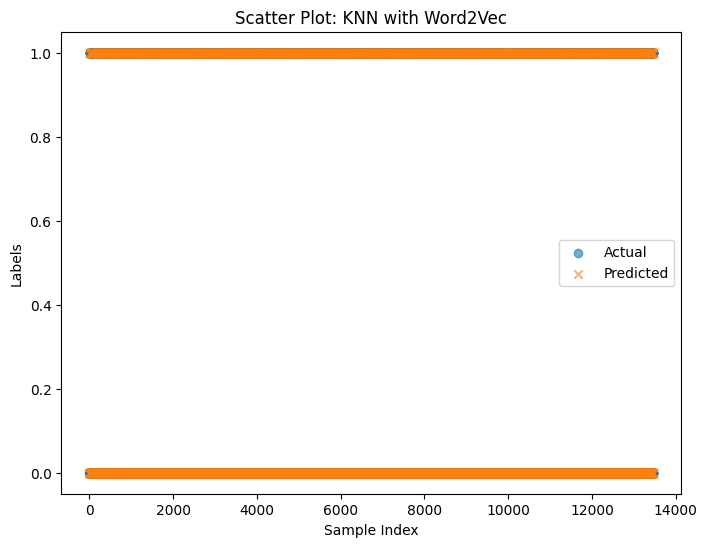

In [161]:
knn_model_word2vec = KNeighborsClassifier(n_neighbors=4,weights='distance',metric='minkowski')
evaluate_model_with_visualizations(knn_model_word2vec, X_train_word2vec, X_test_word2vec, y_train, y_test, "KNN", "Word2Vec")

Performing 5-Fold Cross-Validation for KNN with Doc2Vec...
KNN with Doc2Vec - Cross-validation Scores: [0.60999682 0.5985355  0.59990447 0.61216367 0.59035185]
KNN with Doc2Vec - Mean CV Accuracy: 0.6022


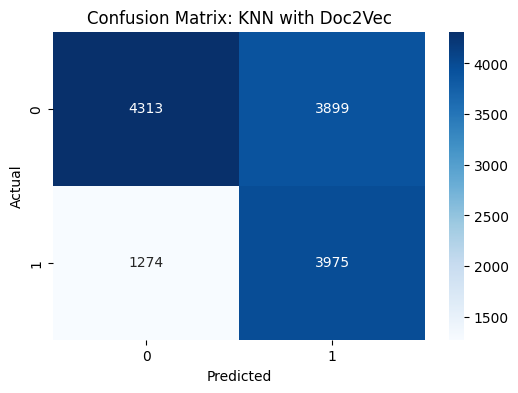

KNN with Doc2Vec - Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.53      0.63      8212
           1       0.50      0.76      0.61      5249

    accuracy                           0.62     13461
   macro avg       0.64      0.64      0.62     13461
weighted avg       0.67      0.62      0.62     13461



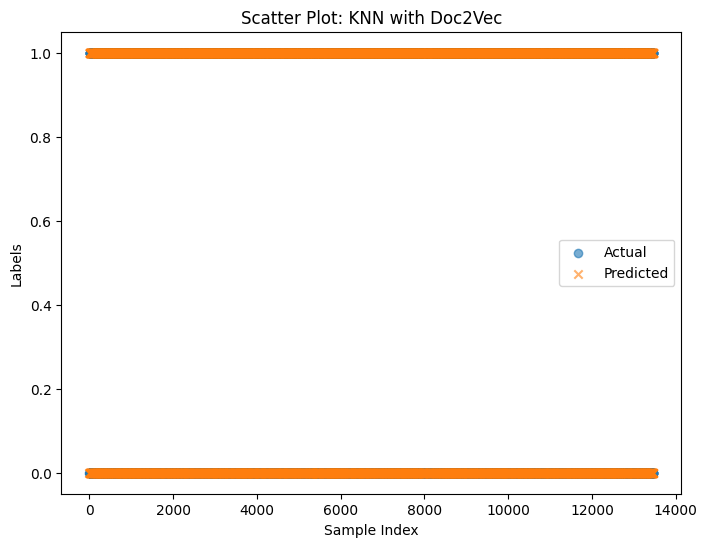

In [162]:
knn_model_doc2vec = KNeighborsClassifier(n_neighbors=2,weights='distance',metric='minkowski')
evaluate_model_with_visualizations(knn_model_doc2vec, X_train_doc2vec, X_test_doc2vec, y_train, y_test, "KNN", "Doc2Vec")

#**Implementing the best embedding technique for each model and using it on custom data**


#1.   SVM :- TF-IDF
#2.   Decision Tree :- Word2Vec
#3.   Random Forest :- TF-IDF
#4.   KNN :- Word2Vec  



In [ ]:
# svm_model = SVC(class_weight='balanced',random_state=42)
# svm_model.fit(X_train_tfidf, y_train)

# decision_tree_model = DecisionTreeClassifier(random_state=42)
# decision_tree_model.fit(X_train_word2vec, y_train)

# random_forest_model = RandomForestClassifier(random_state=42)
# random_forest_model.fit(X_train_tfidf, y_train)

# knn_model = KNeighborsClassifier(n_neighbors=3)
# knn_model.fit(X_train_word2vec, y_train)

In [151]:
custom_data = input()
#custom_data = "Good Morning Everyone, I am your teacher for today"
preprocessed_custom_data = preprocess(custom_data)
print(preprocessed_custom_data)
#for word in preprocessed_custom_data.split():
#    if word not in word2vec_model.wv:
#        print(f"Missing word: {word}")

custom_data_tfidf = tfidf_vectorizer.transform([preprocessed_custom_data])

#def update_word2vec_with_custom_data(preprocessed_data, word2vec_model):
#    """Updating Word2Vec model with custom data if new words are found."""
#    new_sentences = [preprocessed_data.split()]

#    word2vec_model.build_vocab(new_sentences, update=True)
#    word2vec_model.train(new_sentences, total_examples=len(new_sentences), epochs=5)


#update_word2vec_with_custom_data(preprocessed_custom_data, word2vec_model)

#custom_data_word2vec = [calculate_average_word_vector(preprocessed_custom_data.split(), word2vec_model, word2vec_model.vector_size)]
custom_data_word2vec = np.array([calculate_average_word_vector(preprocessed_custom_data.split(), word2vec_model, word2vec_model.vector_size)]).reshape(1, -1)

print(custom_data_tfidf.shape)
print(custom_data_word2vec.shape)


prediction_svm = svm_model_tfidf.predict(custom_data_tfidf)
print("Prediction using SVM using TF-IDF:", prediction_svm)
prediction_svm = svm_model_word2vec.predict(custom_data_word2vec)
print("Prediction using SVM using Word2Vec:", prediction_svm)

prediction_decision_tree = decision_tree_model_tfidf.predict(custom_data_tfidf)
print("Prediction using Decision Tree using TF-IDF:", prediction_decision_tree)
prediction_decision_tree = decision_tree_model_word2vec.predict(custom_data_word2vec)
print("Prediction using Decision Tree using Word2Vec:", prediction_decision_tree)

prediction_random_forest = random_forest_model_tfidf.predict(custom_data_tfidf)
print("Prediction using Random Forest using TF-IDF:", prediction_random_forest)
prediction_random_forest = random_forest_model_word2vec.predict(custom_data_word2vec)
print("Prediction using Random Forest using Word2Vec:", prediction_random_forest)

prediction_knn = knn_model_tfidf.predict(custom_data_tfidf)
print("Prediction using KNN using TF-IDF:", prediction_knn)
prediction_knn = knn_model_word2vec.predict(custom_data_word2vec)
print("Prediction using KNN using Word2Vec:", prediction_knn)

Term Frequency - Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents (i.e., relative to a corpus).  Words within a text document are transformed into importance numbers by a text vectorization process. There are many different text vectorization scoring schemes, with TF-IDF being one of the most common.
Term Frequency Inverse Document Frequency TF IDF widely use statistical method natural language processing information retrieval measure important term within document relative collection document relative corpus word within text document transform importance number text vectorization process many different text vectorization scoring scheme TF IDF one common
(1, 5000)
(1, 200)
Prediction using SVM using TF-IDF: [1]
Prediction using SVM using Word2Vec: [1]
Prediction using Decision Tree using TF-IDF: [1]
Prediction using